In [2]:
import pybamm
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
import process_experimental_data

In [4]:
dataset_all=process_experimental_data.import_thermal_data(1,25)
dataset=pd.DataFrame(dataset_all['791'])
#process_experimental_data.clean_dataset(dataset)

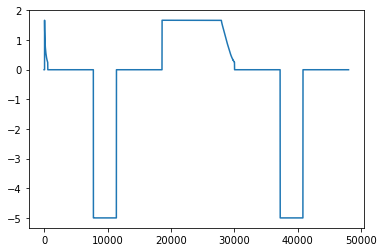

In [30]:
plt.plot(dataset['Current [A]'])

In [41]:
dataset[7760:]

,Step,Status,Step Time [s],Time [s],Cycle,Cycle Level,Procedure,Voltage [V],Current [A],AhAccu [Ah],AhPrev [Ah],WhAccu [Wh],Watt [W],Temp Cell [degC]
7760,9,PAU,7200.101,14894.177,1,1,MSM_Rate_1C,4.17895,0.00000,0.0811,0.08110,0.34060,0.00000,24.5
7761,10,RANGE,0.000,14894.210,1,1,MSM_Rate_1C,4.17907,0.00000,0.0811,0.08110,0.34060,0.00000,24.5
7762,10,RANGE,0.000,14894.210,1,1,MSM_Rate_1C,4.17907,0.00000,0.0811,0.08110,0.34060,0.00000,24.5
7763,11,DCH,0.000,14894.211,1,1,MSM_Rate_1C,4.01795,-4.99210,0.0811,0.08110,0.34060,0.00000,24.5
7764,11,DCH,1.007,14895.218,1,1,MSM_Rate_1C,4.00961,-4.99958,0.0799,0.08110,0.33579,-20.05027,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48046,12,PAU,7199.076,54759.939,2,1,MSM_Rate_1C,3.07262,0.00000,-4.7532,4.78759,-14.65354,0.00000,24.3
48047,12,PAU,7200.061,54760.924,2,1,MSM_Rate_1C,3.07262,0.00000,-4.7532,4.78759,-14.65354,0.00000,24.3
48048,12,PAU,7200.061,54760.924,2,1,MSM_Rate_1C,3.07273,0.00000,-4.7532,4.78759,-14.65354,0.00000,24.3
48049,9999,STO,0.000,54760.954,0,0,MSM_Rate_1C,3.07262,0.00000,-4.7532,4.78759,-14.65354,0.00000,24.3


In [50]:
dataset.query('Status == ["DHC"]')

,Step,Status,Step Time [s],Time [s],Cycle,Cycle Level,Procedure,Voltage [V],Current [A],AhAccu [Ah],AhPrev [Ah],WhAccu [Wh],Watt [W],Temp Cell [degC]


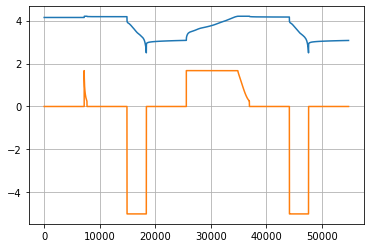

In [18]:
plt.plot(dataset['Time [s]'] , dataset['Voltage [V]'], dataset['Time [s]'], dataset['Current [A]'])
plt.grid()

In [7]:
model= pybamm.lithium_ion.DFN()

In [8]:
param = pybamm.ParameterValues("Chen2020")
#param

In [19]:
sim = pybamm.Simulation(model, parameter_values=param)
sim.solve([0, 4000])
sim.plot(["Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3554.1816827290813, step=35.541816827290816)…

In [20]:
sim.solution["Terminal voltage [V]"].entries

array([4.03250458, 3.9494523 , 3.9337335 , 3.92829811, 3.92355907,
       3.91710344, 3.9083754 , 3.8978256 , 3.88617945, 3.87407965,
       3.86198622, 3.85020597, 3.83890124, 3.82814595, 3.81793285,
       3.80820306, 3.79883536, 3.78966866, 3.78053579, 3.77131542,
       3.76193988, 3.75237351, 3.74259109, 3.73256753, 3.7222722 ,
       3.71167021, 3.70071889, 3.68937842, 3.67761255, 3.66540319,
       3.65277644, 3.63985547, 3.6268968 , 3.61422214, 3.60207166,
       3.59054849, 3.57966771, 3.56940612, 3.55972724, 3.55058372,
       3.54191817, 3.53366214, 3.52574108, 3.51807753, 3.51059699,
       3.50323139, 3.49592186, 3.48861955, 3.48128466, 3.47388516,
       3.46639495, 3.45879197, 3.45105663, 3.44317058, 3.43511479,
       3.42686971, 3.41841206, 3.40971609, 3.40075019, 3.39147902,
       3.38186375, 3.3718698 , 3.36148013, 3.35071931, 3.33967291,
       3.32848712, 3.31732397, 3.30629907, 3.29542785, 3.28461511,
       3.27368353, 3.2624117 , 3.25055679, 3.23783489, 3.22386

In [21]:
sim.solution["Time [s]"].entries

array([   0.        ,   40.4040404 ,   80.80808081,  121.21212121,
        161.61616162,  202.02020202,  242.42424242,  282.82828283,
        323.23232323,  363.63636364,  404.04040404,  444.44444444,
        484.84848485,  525.25252525,  565.65656566,  606.06060606,
        646.46464646,  686.86868687,  727.27272727,  767.67676768,
        808.08080808,  848.48484848,  888.88888889,  929.29292929,
        969.6969697 , 1010.1010101 , 1050.50505051, 1090.90909091,
       1131.31313131, 1171.71717172, 1212.12121212, 1252.52525253,
       1292.92929293, 1333.33333333, 1373.73737374, 1414.14141414,
       1454.54545455, 1494.94949495, 1535.35353535, 1575.75757576,
       1616.16161616, 1656.56565657, 1696.96969697, 1737.37373737,
       1777.77777778, 1818.18181818, 1858.58585859, 1898.98989899,
       1939.39393939, 1979.7979798 , 2020.2020202 , 2060.60606061,
       2101.01010101, 2141.41414141, 2181.81818182, 2222.22222222,
       2262.62626263, 2303.03030303, 2343.43434343, 2383.83838

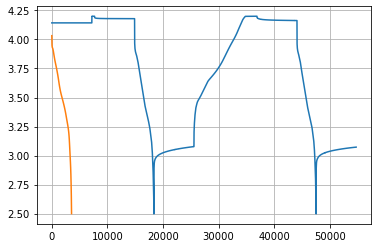

In [29]:
plt.plot(dataset['Time [s]'] , dataset['Voltage [V]'], sim.solution["Time [s]"].entries, sim.solution["Terminal voltage [V]"].entries)
plt.grid()